In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data1 = pd.read_csv("./CMO_MSP_Mandi.csv")
data2 = pd.read_csv("./Monthly_data_cmo.csv")

In [4]:
data1.head()

,commodity,year,Type,msprice,msp_filter
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0,1
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0,1
2,Jowar_Hybrid,2012,Kharif Crops,1500.0,1
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0,1
4,BAJRI,2012,Kharif Crops,1175.0,1


In [5]:
data2.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


In [6]:
data1.info()
print('_'*40);
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
commodity     155 non-null object
year          155 non-null int64
Type          155 non-null object
msprice       145 non-null float64
msp_filter    155 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.1+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62429 entries, 0 to 62428
Data columns (total 11 columns):
APMC               62429 non-null object
Commodity          62429 non-null object
Year               62429 non-null int64
Month              62429 non-null object
arrivals_in_qtl    62429 non-null int64
min_price          62429 non-null int64
max_price          62429 non-null int64
modal_price        62429 non-null int64
date               62429 non-null object
district_name      62429 non-null object
state_name         62429 non-null object
dtypes: int64(5), object(6)
memory usage: 5.2+ MB


In [7]:
### data1 contains null values

In [8]:
data1.describe()


,year,msprice,msp_filter
count,155.000000,145.000000,155.0
mean,2014.000000,2822.448276,1.0
std,1.418798,1441.725928,0.0
min,2012.000000,170.000000,1.0
25%,2013.000000,1470.000000,1.0
50%,2014.000000,2970.000000,1.0
75%,2015.000000,4000.000000,1.0
max,2016.000000,6240.000000,1.0


In [9]:
#print("-"*40)
#work with data2
data2.describe()

,Year,arrivals_in_qtl,min_price,max_price,modal_price
count,62429.000000,6.242900e+04,6.242900e+04,6.242900e+04,62429.000000
mean,2015.337503,6.043088e+03,2.945228e+03,3.688814e+03,3296.003989
std,0.690451,3.470331e+04,1.318396e+04,7.662962e+03,3607.792534
min,2014.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2015.000000,3.800000e+01,1.250000e+03,1.600000e+03,1450.000000
50%,2015.000000,2.110000e+02,1.976000e+03,2.797000e+03,2425.000000
75%,2016.000000,1.364000e+03,3.900000e+03,4.647000e+03,4257.000000
max,2016.000000,1.450254e+06,3.153038e+06,1.600090e+06,142344.000000


In [10]:
data2.columns.values

array(['APMC', 'Commodity', 'Year', 'Month', 'arrivals_in_qtl',
       'min_price', 'max_price', 'modal_price', 'date', 'district_name',
       'state_name'], dtype=object)

In [11]:
data2.APMC.unique()

array(['Ahmednagar', 'Akole', 'Jamkhed', 'Kopargaon', 'Newasa',
       'Newasa-Ghodegaon', 'Parner', 'Pathardi', 'Rahata', 'Rahuri',
       'Rahuri-Vambori', 'Sangamner', 'Shevgaon', 'Shevgaon-Bodhegaon',
       'Shrirampur', 'Shrirampur-Belapur', 'Shrigonda',
       'Shrigonda-Ghogargaon', 'Karjat (A- Nagar)', 'Rahuri-Songaon',
       'Akola', 'Akot', 'Balapur', 'Murtizapur', 'Patur', 'Telhara',
       'Barshi Takli', 'Achalpur', 'Amarawati',
       'Amarawati-Fruit And Vegetables', 'Anajngaon Surji',
       'Chandur Bajar', 'Chandur Rly.', 'Daryapur', 'Dhamangaon-Rly',
       'Dharni', 'Morshi', 'Nandgaon Khandeshwar', 'Varud',
       'Varud-Rajura Bazar', 'Tiwasa', 'Aurangabad', 'Fulambri',
       'Gangapur', 'Kannad', 'Lasur Station', 'Paithan', 'Sillod',
       'Sillod-Bharadi', 'Soygaon', 'Vaijapur', 'Khultabad', 'Ambejogai',
       'Beed', 'Gevrai', 'Kada', 'Kada (Ashti)', 'Kej', 'Kille Dharur',
       'Majalgaon', 'Parli-Vaijnath', 'Bhandara', 'Lakhandur', 'Lakhani',
       'Pa

In [12]:
data2.describe(include = ['O'])

,APMC,Commodity,Month,date,district_name,state_name
count,62429,62429,62429,62429,62429,62429
unique,349,352,12,27,33,1
top,Mumbai,Gram,November,2016-01,Pune,Maharashtra
freq,1538,3972,7183,2769,6366,62429


In [13]:
data2[['APMC', 'modal_price']].groupby(['APMC'], as_index = False).mean().sort_values(by = 'APMC', ascending = False)

,APMC,modal_price
348,Zarijamini,4246.576923
347,Yeotmal,4446.177143
346,Yeola,2917.364583
345,Yawal,2598.473214
344,Washim-Ansing,4923.872340
343,Washim,4252.589520
342,Washi(Osmanabad),2912.909091
341,Wardha,4096.688525
340,Vita,2511.138889
339,Vasai,1885.314815


In [14]:
data2[['Commodity', 'modal_price']].groupby(['Commodity'], as_index = False).mean().sort_values(by = 'Commodity', ascending = False)

,Commodity,modal_price
351,Zendu,2849.454545
350,Wood Apple,1943.750000
349,Wheat(Unhusked),3091.658385
348,Wheat(Husked),1690.343386
347,Water Melon,825.122449
346,Walvad,2589.521739
345,Wal Papdi,2621.471074
344,Wal Bhaji,2344.893443
343,WHEAT(UNHUSKED),2947.833333
342,WHEAT(HUSKED),1897.516556


In [15]:
data2[['district_name', 'modal_price']].groupby(['district_name'], as_index = False).mean().sort_values(by = 'district_name', ascending = False)

,district_name,modal_price
32,Yewatmal,4200.476289
31,Wasim,4617.127593
30,Wardha,4250.390476
29,Thane,3013.180151
28,Solapur,2556.886163
27,Satara,2650.142187
26,Sangli,4212.125553
25,Ratnagiri,2554.472648
24,Raigad,2215.632787
23,Pune,2782.104147


In [16]:
data2[['arrivals_in_qtl', 'modal_price']].groupby(['arrivals_in_qtl'], as_index = False).mean().sort_values(by = 'arrivals_in_qtl', ascending = False)

,arrivals_in_qtl,modal_price
11168,1450254,778.000000
11167,1410555,364.000000
11166,1190800,905.000000
11165,1134276,1012.000000
11164,1097423,951.000000
11163,1083780,1090.000000
11162,1056500,2300.000000
11161,1015698,637.000000
11160,1000979,895.000000
11159,990086,371.000000


## Visualization

In [17]:
import seaborn as sns
sns.set(style = 'darkgrid')

In [18]:
data2['Year'].unique()

array([2015, 2016, 2014])

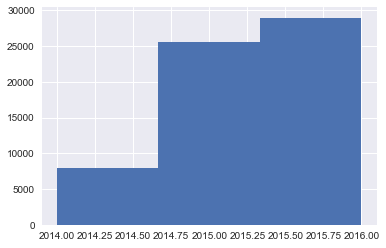

In [19]:
X = data2['Year']
y = data2['modal_price']
plt.hist(X, bins =3, stacked = True, histtype='bar')

plt.show()

In [20]:
data1['Type'].unique()

array(['Kharif Crops', 'Rabi Crops', 'Other Crops'], dtype=object)